### $1.-$ Realice un notebook en el se programen y expliquen los siguientes algoritmos de integración de ecuaciones diferenciales:

$(a)$ Integración con método de Euler

$(b)$ Integración sobre serie de Taylor a $2^o$ orden

$(c)$ Integración con método de Runge-Kutta de 2$^o$ orden 

$(d)$ Integración con método de Runge-Kutta de 4$^o$ orden

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$$\ddot{x}+0.5\dot{x}+sin(x)=e^{-t}\,sin(3t)$$
Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

In [1]:
from pylab import * 
%matplotlib inline
import random

### Solución:

#### $(a)$ Integración con método de Euler

El algoritmo de Euler utiliza esta expansión en series de Taylor
lineal para calcular una nueva aproximación $y_{k+1}$ mediante:

$$y_{k+1} = y_k +hf\left(y_k,t_k\right) $$

Siendo éste el algoritmo más sencillo para resolver numéricamente ecuaciones diferenciales ordinarias.


In [2]:
def euler(edo,y_i,t,h=0.01): 
    tiempo=arange(t[0],t[1]+h,h) #divide intervalos en h arange
    y=zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i #condicion inicial
    for i in xrange(len(y)-1):
        y[i+1]=y[i]+h*edo(y[i],tiempo[i])
    return tiempo,y

#### $(b)$ Integración sobre serie de Taylor a $2^o$ orden

$$
y_{k+1} = y_k +hf + \frac{h^2}{2} \left(\frac{\partial f}{\partial y} + \frac{\partial f}{\partial t}f \right)
$$
donde $f$ y sus parciales estan evaluadas en $f(y_k,t_k)$

In [3]:
def segundo_orden(edo,d_edo,y_i,t,h=0.1): #dos dimensiones
    tiempo=arange(t[0],t[1]+h,h) #divide intervalos en h arange
    y=zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i #condicion inicial
    for i in xrange(len(tiempo)-1):
        f = edo(y[i,:], tiempo[i])
        df, jacobiano = d_edo(y[i,:], tiempo[i])
        y[i+1,:]=y[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempo, y

#### $(c)$ Integración con método de Runge-Kutta de 2$^o$ orden 

Los métodos de Runge–Kutta utilizan indirectamente el algoritmo de Taylor. En general, estos métodos evalúan f(x,y) en más de un punto en la proximidad de $(y_k,y_k)$ en lugar de evaluar derivadas de $f(y,t)$, las cuales se necesitarían para el uso directo del algoritmo por series de Taylor.

La derivación de estos métodos se acompaña de la suposición de un algoritmo particular con ciertos coeficientes indeterminados ($k_{i}$). Los valores de estos términos constantes se encuentran igualando la fórmula de Runge–Kutta de orden $n$ al algoritmo de Taylor de orden $n$.

El método de Rune-Kutta de segundo orden (método mejorado de Euler) es:
$$y_{k+1}=y_{k}+hf\left(y_{k}+\frac{1}{2}k,t_{k}+\frac{1}{2}h\right)\\
y_0=y(a)$$



In [4]:
def rk2(edo,y_i,t,h=0.1):#Runge Kutta de segundo orden
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    for i in xrange(len(tiempo)-1):
        k=h*edo(y[i,:], tiempo[i])
        f=edo(y[i,:]+0.5*k,tiempo[i]+0.5*h) #evaluando en el i-esimo
        y[i+1,:]=y[i,:]+h*f #cero no esta involucrado, esta en cuenta en y_i
    return tiempo,y

#### $(d)$ Integración con método de Runge-Kutta de 4$^o$ orden



Método de Runge-Kutta cuyo orden de convergencia es 4 (equivalentemente a utilizar un método basado en el desarrollo de Taylor hasta $h^4$). El método se describe como:
$$y_{k+1}=y_{k}+\frac{h}{6}\left(k_1+2k_2+2k_3+k_4\right)\\
y_0=y(a)$$

Donde las cantidades $k_{i},\,i\in\{1,...,4\}$ se calculan mediante:

$k_1=f(y_k,t_k)$

$k_2=f\left(y_k+\frac{1}{2}hk_1,t_k+\frac{1}{2}h\right)$

$k_3=f\left(y_k+\frac{1}{2}hk_2,t_k+\frac{1}{2}h\right)$

$k_4=f\left(y_k+hk_3,t_k+h\right)$

In [5]:
def rk4(edo,y_i,t,h=0.1): #Runge Kutta de segundo orden
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    for i in xrange(len(tiempo)-1):
        k1=edo(y[i,:],tiempo[i])
        k2=edo(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
        k3=edo(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
        k4=edo(y[i,:]+h*k3,tiempo[i]+h)
        #evaluando en el i-esimo
        y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    return tiempo,y

#### Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$$\ddot{x}+0.5\dot{x}+sin(x)=e^{-t}\,sin(3t)$$
#### Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

Primero se define la ecuacion diferencial; en base a un cambio de variable se llega al siguiente sistema de ecuaciones diferecnciales de primer orden:

$y=\dot{x}$

$\dot{y}=\ddot{x}=-0.5y-sin(x)+e^{-t}\,sin(3t)$

para los correspondientes integradores anteriormente programados, se verifica:

In [6]:
#Se define la ecuacion diferencial a resolver y su correspondiente derivada por medio de lo siguiente:
def prueba(y,t): #x'=y, x''=y'=exp(-t)sin(3t)-sinx-0.5y, donde y[1]=y, y[0]=x
    return array([y[1],exp(-t)*sin(3*t)-0.5*y[1]-sin(y[0])]) 

def d_prueba(y,t):
    return array ([0, (3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(y[0]),-0.5]]) #En el primer array corresponde
#a la derivada con respecto de t, en segundo array respecto a las demas variables dependientes, x e y


En conjunto las soluciones para cada uno de los integradores en el plano fase con $h=0.1$, son:

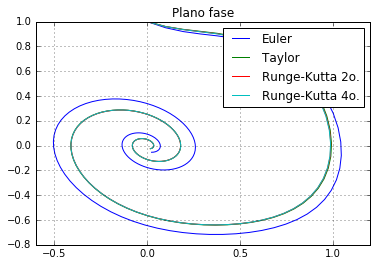

In [7]:
t,y1=euler(prueba,[0.,1.],[0.,5*pi],0.1) # [10 indica tiempo inicial y final], [1.,0.] indica condicion inicial
plot(y1[:,0],y1[:,1],label='Euler')

t,y2=segundo_orden(prueba,d_prueba,[0.,1.],[0.,5*pi],0.1)
plot(y2[:,0],y2[:,1],label='Taylor')

t,y3=rk2(prueba,[0.,1.],[0.,5*pi],0.1)
plot(y3[:,0],y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk4(prueba,[0.,1.],[0.,5*pi],0.1)
plot(y4[:,0],y4[:,1],label='Runge-Kutta 4o.')

grid(True)
title('Plano fase')
legend()
show()

En conjunto las soluciones para cada uno de los integradores en el plano $t\,vs\,x(t)$ con $h=0.1$, son:

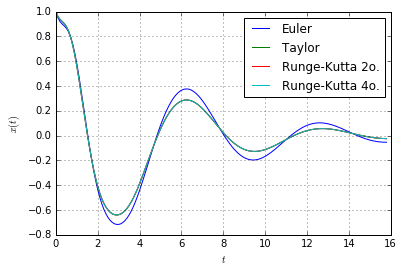

In [8]:
t,y1=euler(prueba,[0.,1.],[0.,5*pi],0.1) # [10 indica tiempo inicial y final], [1.,0.] indica condicion inicial
plot(t,y1[:,1],label='Euler')

t,y2=segundo_orden(prueba,d_prueba,[0.,1.],[0.,5*pi],0.1)
plot(t,y2[:,1],label='Taylor')

t,y3=rk2(prueba,[0.,1.],[0.,5*pi],0.1)
plot(t,y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk2(prueba,[0.,1.],[0.,5*pi],0.1)
plot(t,y4[:,1],label='Runge-Kutta 4o.')

grid(True)
xlabel('$t$')
ylabel('$x(t)$')
legend()
show()

En conjunto las soluciones para cada uno de los integradores en el plano fase con $h=0.01$, son:

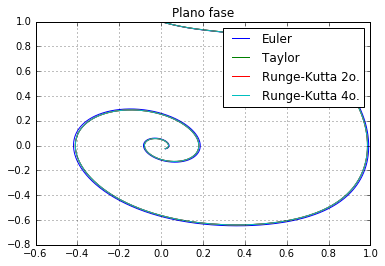

In [9]:
t,y1=euler(prueba,[0.,1.],[0.,5*pi],0.01) # [10 indica tiempo inicial y final], [1.,0.] indica condicion inicial
plot(y1[:,0],y1[:,1],label='Euler')

t,y2=segundo_orden(prueba,d_prueba,[0.,1.],[0.,5*pi],0.01)
plot(y2[:,0],y2[:,1],label='Taylor')

t,y3=rk2(prueba,[0.,1.],[0.,5*pi],0.01)
plot(y3[:,0],y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk4(prueba,[0.,1.],[0.,5*pi],0.01)
plot(y4[:,0],y4[:,1],label='Runge-Kutta 4o.')

grid(True)
title('Plano fase')
legend()
show()

En conjunto las soluciones para cada uno de los integradores en el plano $t\,vs\,x(t)$ con $h=0.01$, son:

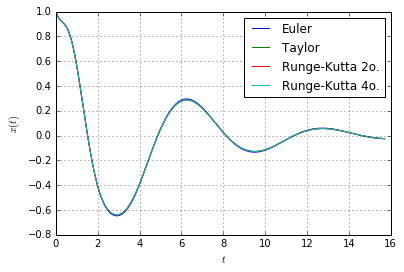

In [10]:
t,y1=euler(prueba,[0.,1.],[0.,5*pi],0.01) # [10 indica tiempo inicial y final], [1.,0.] indica condicion inicial
plot(t,y1[:,1],label='Euler')

t,y2=segundo_orden(prueba,d_prueba,[0.,1.],[0.,5*pi],0.01)
plot(t,y2[:,1],label='Taylor')

t,y3=rk2(prueba,[0.,1.],[0.,5*pi],0.01)
plot(t,y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk2(prueba,[0.,1.],[0.,5*pi],0.01)
plot(t,y4[:,1],label='Runge-Kutta 4o.')

grid(True)
xlabel('$t$')
ylabel('$x(t)$')
legend()
show()

### $2.-$ Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:

$$\dddot{y}+\ddot{y}^{2}-3\dot{y}^{3}+cos^{2}(y)=e^{-t}\,sin(3t)$$

Con condiciones iniciales $\ddot{y}(1) = 1$, $\dot{y}(1) = 2$, $y(1) = 1$. En particular que sucede en el intervalo $t \in [1, 2]$ y $t \in [1, 2.1]$.

Realizando un cambio de variable para esta ecuación diferencial, se tiene

$$\dot{y}=x$$
$$\ddot{y}=\dot{x}=z$$
$$\dddot{y}=\ddot{x}=\dot{z}$$

Con condiciones iniciales:

$\ddot{y}(1)=\dot{x}(1)=z(1)=1$, $\dot{y}=x(1)=2$, $y(1)=1$

### Solución:

Entonces el sistema de ecuaciones diferenciales a resolver es:

$$\dot{y}=x$$
$$\dot{x}=z$$
$$\dot{z}=e^{-t}\,sin(3t)-z^{2}+3x^{3}-cos^{2}(y)$$




In [11]:
#Se define la ecuacion diferencial a resolver y sus correspondientes derivadas por medio de lo siguiente:
def prueba_1(y,t):
    return array([y[1],y[2],exp(-t)*sin(3*t)-y[2]**2+3*y[1]**3-cos(y[0])**2])
def d_prueba_1(y, t):
    return array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1,0], [0,0,1], [sin(2*y[0]),9*y[1]*y[1],-2*y[2]]])

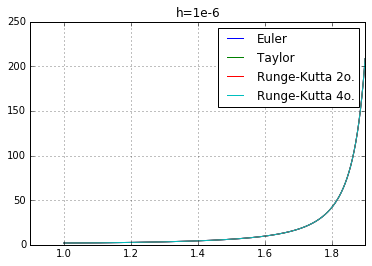

In [12]:
t,y1=euler(prueba_1,[1.,2.,1.],[1.,1.90],1e-6) # [10 indica tiempo inicial y final], [1.,0.] indica condicion inicial
plot(t,y1[:,1],label='Euler')

t,y2=segundo_orden(prueba_1,d_prueba_1,[1.,2.,1.],[1.,1.90],1e-6)
plot(t,y2[:,1],label='Taylor')

t,y3=rk2(prueba_1,[1.,2.,1.],[1.,1.90],1e-6)
plot(t,y3[:,1],label='Runge-Kutta 2o.')

t,y4=rk4(prueba_1,[1.,2.,1.],[1.,1.90],1e-6)
plot(t,y4[:,1],label='Runge-Kutta 4o.')

grid(True)
title('h=1e-6')
legend()
show()

### $3.-$ Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial:

$$\ddot{x}+\frac{1}{10}\dot{x}+4sin(x)=\frac{1}{2}sin(\omega t)$$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega=\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado.

### Solución
Primero se define la ecuacion diferencial; en base a un cambio de variable se llega al siguiente sistema de ecuaciones diferecnciales de primer orden:

$y=\dot{x}$

$\dot{y}=\ddot{x}=-\frac{1}{10}y-4sin(x)+\frac{1}{2}sin(\omega t)$

Para los correspondientes integradores anteriormente programados, se realiza un correspondiente pase de argumentos con respecto a $\omega$, así:

In [13]:
def ec_dif(y,t,omega=1): #x'=y, x''=y'=sin(omega*t)-4sinx-0.1y, donde y[1]=y, y[0]=x
    return array([y[1],0.5*sin(omega*t)-0.1*y[1]-4*sin(y[0])])
def d_ec_dif(y,t,omega=1):
    return array([0,omega*cos(omega*t)]),array([[0,1],[-4*cos(y[0]),-0.1]])

In [14]:
def euler_args(edo,y_i,t,h=0.01,omega=0): 
    tiempo=arange(t[0],t[1]+h,h) #divide intervalos en h arange
    y=zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i #condicion inicial
    if omega==0:
        for i in xrange(len(y)-1):
            y[i+1]=y[i]+h*edo(y[i],tiempo[i])
    else:
         for i in xrange(len(y)-1):
            y[i+1]=y[i]+h*edo(y[i],tiempo[i],omega)
    return tiempo,y

In [15]:
def segundo_orden_args(edo,d_edo,y_i,t,h=0.1,omega=0): #dos dimensiones
    tiempo=arange(t[0],t[1]+h,h) #divide intervalos en h arange
    y=zeros((len(tiempo),len(y_i)))
    y[0,:] = y_i #condicion inicial
    if omega==0:
        for i in xrange(len(tiempo)-1):
            f = edo(y[i,:], tiempo[i])
            df, jacobiano = d_edo(y[i,:], tiempo[i])
            y[i+1,:]=y[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    else:
        for i in xrange(len(tiempo)-1):
            f = edo(y[i,:], tiempo[i],omega)
            df, jacobiano = d_edo(y[i,:], tiempo[i])
            y[i+1,:]=y[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempo, y

In [16]:
def rk2_args(edo,y_i,t,h=0.1,omega=0):#Runge Kutta de segundo orden
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    if omega==0:
        for i in xrange(len(tiempo)-1):
            k=h*edo(y[i,:], tiempo[i])
            f=edo(y[i,:]+0.5*k,tiempo[i]+0.5*h) #evaluando en el i-esimo
            y[i+1,:]=y[i,:]+h*f #cero no esta involucrado, esta en cuenta en y_i
    else:
        for i in xrange(len(tiempo)-1):
            k=h*edo(y[i,:], tiempo[i],omega)
            f=edo(y[i,:]+0.5*k,tiempo[i]+0.5*h,omega) #evaluando en el i-esimo
            y[i+1,:]=y[i,:]+h*f #cero no esta involucrado, esta en cuenta en y_i
    return tiempo,y

In [17]:
def rk4_args(edo,y_i,t,h=0.1,omega=0): #Runge Kutta de segundo orden
    tiempo=arange(t[0],t[1]+h, h)
    y=zeros((len(tiempo),len(y_i)))
    y[0,:]=y_i
    if omega==0:
        for i in xrange(len(tiempo)-1):
            k1=edo(y[i,:],tiempo[i])
            k2=edo(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3=edo(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4=edo(y[i,:]+h*k3,tiempo[i]+h)#evaluando en el i-esimo
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
         for i in xrange(len(tiempo)-1):
            k1=edo(y[i,:],tiempo[i],omega)
            k2=edo(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,omega)
            k3=edo(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,omega)
            k4=edo(y[i,:]+h*k3,tiempo[i]+h,omega)#evaluando en el i-esimo
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    return tiempo,y

A continuación se presenta las gráficas en el plano fase, y $t\,vs\,x(t)$ de las soluciones que representan el comportamiento de la solución en función de  $\omega$, para $\omega=\{1.1,1.2,1.3,...,3\}$

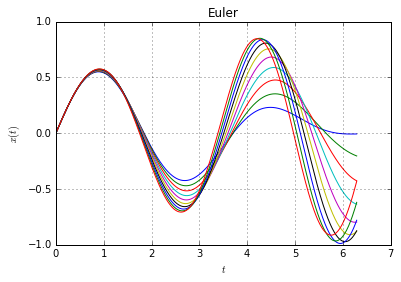

In [18]:
n=1.5
while n<=2.5:
    t,sol = euler_args(ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(t,sol[:,0])
    xlabel('$t$')
    ylabel('$x(t)$')
    grid(True)
    title('Euler')
    n=n+0.1

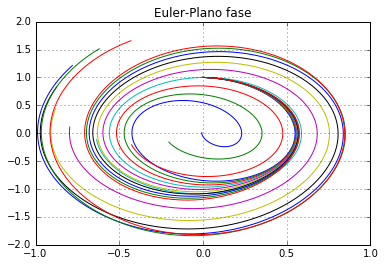

In [19]:
n=1.5
while n<=2.5:
    t,sol = euler_args(ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(sol[:,0],sol[:,1])
    grid(True)
    title('Euler-Plano fase')
    n=n+0.1

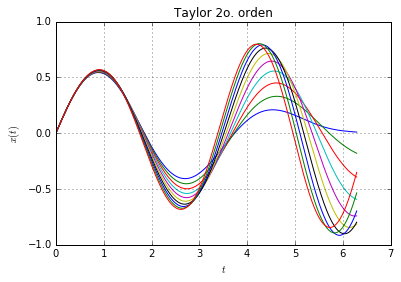

In [20]:
n=1.5
while n<=2.5:
    t,sol1 = segundo_orden_args(ec_dif,d_ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(t,sol1[:,0])
    xlabel('$t$')
    ylabel('$x(t)$')
    grid(True)
    title('Taylor 2o. orden')
    n=n+0.1

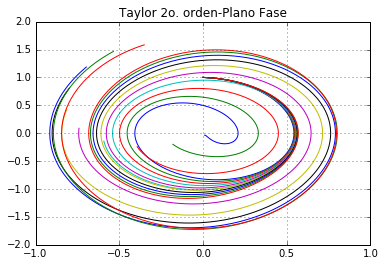

In [21]:
n=1.5
while n<=2.5:
    t,sol1 = segundo_orden_args(ec_dif,d_ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(sol1[:,0],sol1[:,1])
    grid(True)
    title('Taylor 2o. orden-Plano Fase')
    n=n+0.1

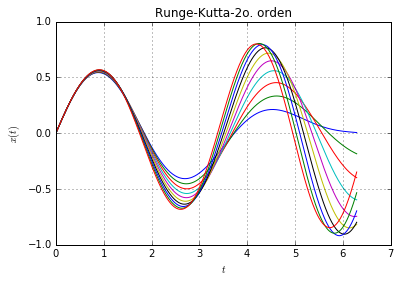

In [22]:
n=1.5
while n<=2.5:
    t,sol2 = rk2_args(ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(t,sol2[:,0])
    xlabel('$t$')
    ylabel('$x(t)$')
    grid(True)
    title('Runge-Kutta-2o. orden')
    n=n+0.1

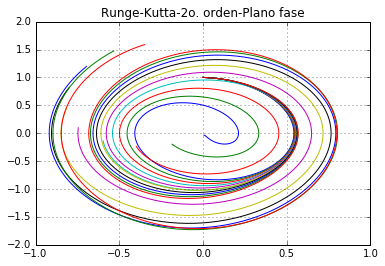

In [23]:
n=1.5
while n<=2.5:
    t,sol2 = rk2_args(ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(sol2[:,0],sol2[:,1])
    grid(True)
    title('Runge-Kutta-2o. orden-Plano fase')
    n=n+0.1

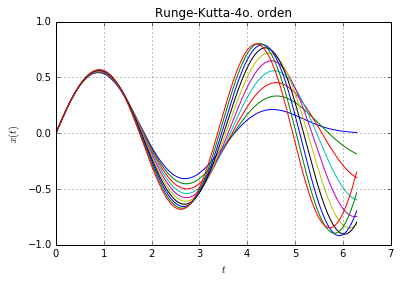

In [24]:
n=1.5
while n<=2.5:
    t,sol3 = rk4_args(ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(t,sol3[:,0])
    xlabel('$t$')
    ylabel('$x(t)$')
    grid(True)
    title('Runge-Kutta-4o. orden')
    n=n+0.1

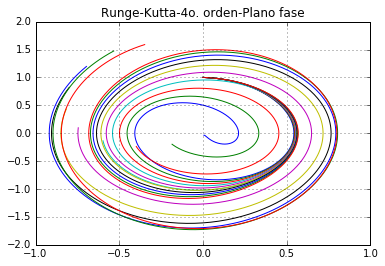

In [25]:
n=1.5
while n<=2.5:
    t,sol3 = rk4_args(ec_dif,[0.0, 1.0],[0, 2*pi],0.01,n)
    plot(sol3[:,0],sol3[:,1])
    grid(True)
    title('Runge-Kutta-4o. orden-Plano fase')
    n=n+0.1

### $4.-$ Considere el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt}=10(y-x)$$
$$\frac{dy}{dt}=x(28-z)-y$$
$$\frac{dz}{dt}=xy-\frac{8}{3}z$$

Realice una integración numérica del sistema de ecuaciones con alguno de los integradores del problema (el más le guste) y realice los siguientes ejercicios:
$(a)$ Elija una condición inicial aleatoria en el $x, y, z \in [−5, 5]$ y realice la gráfica de la solución en el plano $xy$, $xz$ y $yz$ y comente sus observaciones.

$(b)$ Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entre si en $10^{−2}$. Explique lo que observa. 

Nota: De preferencia realice integraciones con tiempos relativamente largos en los que pueda apreciar diferencias en el comportamiento de las soluciones

### Solución
Para el inciso $(a)$ usando el método de Runge-Kutta de cuarto orden, se tiene que, para condiciones iniciales aleatorias de $x, y, z \in [−5, 5]$ las correspondientes soluciones para los planos $xy$, $xz$ y $yz$ son:

In [26]:
x0=random.uniform(-5,5)# devuelve condiciones aleatorias entre -5,5 para la condicion inicial en x
y0=random.uniform(-5,5) # devuelve condiciones aleatorias entre -5,5 para la condicion inicial en y
z0=random.uniform(-5,5) # devuelve condiciones aleatorias entre -5,5 para la condicion inicial en z
print 'x0=',x0,'y0=',y0,'z0=',z0

#se define el sistema de ecuaciones a resolver
def lorenz(y,t):
    return array([10*(y[1]-y[0]),y[0]*(28-y[2])-y[1],y[0]*y[1]-(8/3)*y[2]])

x0= -1.23387947774 y0= 3.52531301503 z0= 2.67646541123


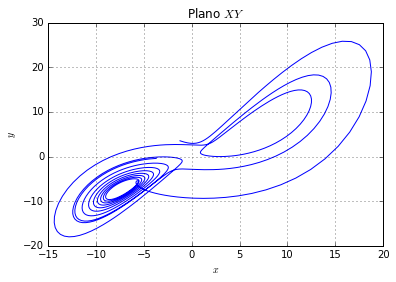

In [27]:
# Solución en el plano xy
t,lor=rk4(lorenz,[x0,y0,z0],[0,10.],0.01) 
plot(lor[:,0],lor[:,1])
grid(True)
title('Plano $XY$')
xlabel('$x$')
ylabel('$y$')
show()

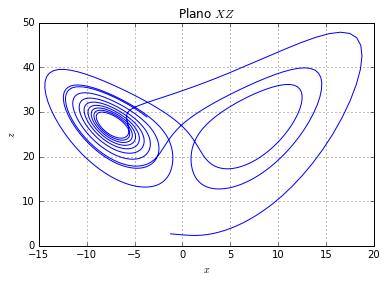

In [28]:
# Solución en el plano xz
t,lor=rk4(lorenz,[x0,y0,z0],[0.,10.],0.01)
plot(lor[:,0],lor[:,2])
title('Plano $XZ$')
xlabel('$x$')
ylabel('$z$')
grid(True)
show()

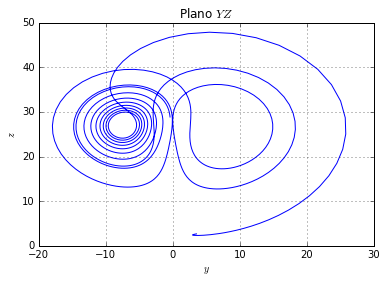

In [29]:
# Solución en el plano yz
t,lor=rk4(lorenz,[x0,y0,z0],[0.,10.],0.01)
plot(lor[:,1],lor[:,2])
grid(True)
title('Plano $YZ$')
xlabel('$y$')
ylabel('$z$')
show()

Se propone 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entre si en $10^{−2}$, es decir:
$$x(0)=1.02$$
$$y(0)=1.04$$
$$z(0)=1.06$$

In [30]:
x1=1.02
y1=3.04
z1=5.06
def lorenz_1(y,t):
    return array([10*(y[1]-y[0]),y[0]*(28-y[2])-y[1],y[0]*y[1]-(8/3)*y[2]])

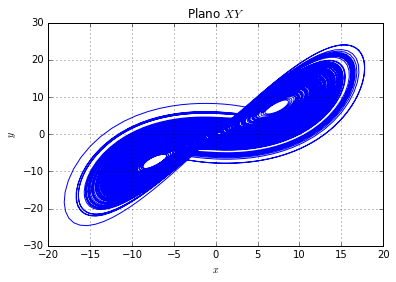

In [31]:
t,lor1=rk4(lorenz_1,[x1,y1,z1],[0.,250.],0.01)
plot(lor1[:,0],lor1[:,1])
grid(True)
title('Plano $XY$')
xlabel('$x$')
ylabel('$y$')
show()

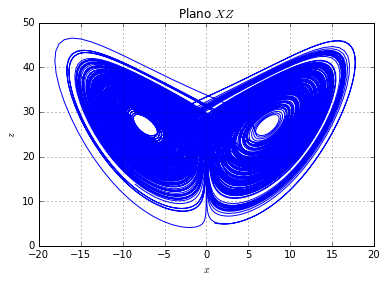

In [32]:
t,lor1=rk4(lorenz_1,[x1,y1,z1],[0.,250.],0.01)
plot(lor1[:,0],lor1[:,2])
title('Plano $XZ$')
xlabel('$x$')
ylabel('$z$')
grid(True)
show()

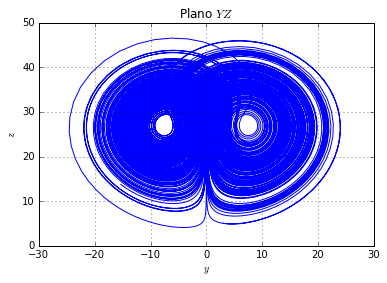

In [33]:
t,lor1=rk4(lorenz_1,[x1,y1,z1],[0.,250.],0.01)
plot(lor1[:,1],lor1[:,2])
grid(True)
title('Plano $YZ$')
xlabel('$y$')
ylabel('$z$')
show()